## 실행O 까지 실행 X

In [11]:
# !pip install pandas_datareader
# !pip install linearmodels
# !pip install yfinance

In [13]:
import pandas as pd
import numpy as np
 
from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web
 
from linearmodels.asset_pricing import LinearFactorModel
 
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from pandas.tseries.offsets import *

#### 1. 주식 가격 데이터 다운로드

In [14]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [36]:
finance_1 = ['DBC','EMLC','VTI','VWO','EEM','TLT','USO','IEF','VWOB','GLD','DBA','SIVR']
rate_1 = [25,15,10,10,7,7,7,6,4,3,2,2]
start_date = '2010-01-01'

In [37]:
price_1 = yf.download(finance_1, start = start_date)
price_1

[*********************100%***********************]  12 of 12 completed


Adj Close                                                          \
                  DBA        DBC        EEM       EMLC         GLD        IEF   
Date                                                                            
2010-01-04  25.999054  24.523520  33.181225        NaN  109.800003  69.356682   
2010-01-05  26.164656  24.552668  33.422062        NaN  109.699997  69.661217   
2010-01-06  26.310772  24.989893  33.491985        NaN  111.510002  69.380142   
2010-01-07  26.106207  24.678976  33.297760        NaN  110.820000  69.380142   
2010-01-08  26.184135  24.659544  33.561913        NaN  111.370003  69.465996   
...               ...        ...        ...        ...         ...        ...   
2022-11-03  19.840000  25.709999  34.730000  22.520000  151.809998  93.620003   
2022-11-04  20.090000  26.580000  36.200001  22.889999  156.470001  93.419998   
2022-11-07  20.160000  26.350000  36.220001  22.959999  155.850006  93.089996   
2022-11-08  20.059999  26.030001  36.480000  23.100000  159.449997  93.709999   
2022-11-09  19.969999  25.430000  35.849998  22.990000  158.649994  94.029999   

                                                          ...    Volume  \
                 SIVR        TLT         USO         VTI  ...       EEM   
Date                                                      ...             
2010-01-04  17.540001  64.176453  322.160004   45.256832  ...  70761600   
2010-01-05  17.799999  64.590881  323.279999   45.430542  ...  50196300   
2010-01-06  18.200001  63.726242  327.760010   45.493729  ...  50670000   
2010-01-07  18.219999  63.833412  325.760010   45.683254  ...  41803700   
2010-01-08  18.480000  63.804863  327.440002   45.833290  ...  41118100   
...               ...        ...         ...         ...  ...       ...   
2022-11-03  18.709999  95.830002   73.290001  186.539993  ...  38319300   
2022-11-04  20.080000  94.220001   76.820000  188.940002  ...  70532700   
2022-11-07  19.959999  93.279999   76.559998  190.660004  ...  38404800   
2022-11-08  20.530001  94.300003   74.470001  191.660004  ...  36282400   
2022-11-09  20.200001  94.610001   71.669998  187.529999  ...  34147800   

                                                                      \
                 EMLC       GLD      IEF     SIVR       TLT      USO   
Date                                                                   
2010-01-04        NaN  16224100   619100   120800   2829100  1426038   
2010-01-05        NaN  14213100  1547500   169400   2841600  1306275   
2010-01-06        NaN  24981900   365500   204900   4099600  2473725   
2010-01-07        NaN  13609800   390900    89500   2793200  1252963   
2010-01-08        NaN  15894600   382500   236000   2910700  1174188   
...               ...       ...      ...      ...       ...      ...   
2022-11-03   592000.0   5378800  8403900   525000  29097500  1482000   
2022-11-04  1173800.0   7683800  5285900  1779200  23555400  3678200   
2022-11-07  1352100.0   4425700  4289300   402900  14522800  2231400   
2022-11-08   700700.0  11299600  4679200  1463700  20360600  2539700   
2022-11-09  3125700.0   6036300  3658100   586600  15628100  2584600   

                                           
                 VTI       VWO       VWOB  
Date                                       
2010-01-04   2251500  16750400        NaN  
2010-01-05   1597700  13083300        NaN  
2010-01-06   2120300  16128000        NaN  
2010-01-07   1656700   7696600        NaN  
2010-01-08   1650000   7663100        NaN  
...              ...       ...        ...  
2022-11-03   3935600  19192000  3448400.0  
2022-11-04   3584600  18646100   482000.0  
2022-11-07   3420000  14516600   280000.0  
2022-11-08   4847500  16713600   367600.0  
2022-11-09  13958600  11003200   324800.0  

[3237 rows x 72 columns]

In [38]:
finance_2 = ['APLE','TSLA']
rate_2 = [50,50]
start_date = '2010-01-01'

In [39]:
price_2 = yf.download(finance_2, start = start_date)
price_2

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 APLE        TSLA       APLE        TSLA       APLE   
Date                                                                  
2010-06-29        NaN    1.592667        NaN    1.592667        NaN   
2010-06-30        NaN    1.588667        NaN    1.588667        NaN   
2010-07-01        NaN    1.464000        NaN    1.464000        NaN   
2010-07-02        NaN    1.280000        NaN    1.280000        NaN   
2010-07-06        NaN    1.074000        NaN    1.074000        NaN   
...               ...         ...        ...         ...        ...   
2022-11-03  16.080000  215.309998  16.080000  215.309998  16.230000   
2022-11-04  16.209999  207.470001  16.209999  207.470001  16.514999   
2022-11-07  16.200001  197.080002  16.200001  197.080002  16.430000   
2022-11-08  15.770000  191.300003  15.770000  191.300003  16.305000   
2022-11-09  15.500000  177.589996  15.500000  177.589996  15.905000   

                              Low                   Open              \
                  TSLA       APLE        TSLA       APLE        TSLA   
Date                                                                   
2010-06-29    1.666667        NaN    1.169333        NaN    1.266667   
2010-06-30    2.028000        NaN    1.553333        NaN    1.719333   
2010-07-01    1.728000        NaN    1.351333        NaN    1.666667   
2010-07-02    1.540000        NaN    1.247333        NaN    1.533333   
2010-07-06    1.333333        NaN    1.055333        NaN    1.333333   
...                ...        ...         ...        ...         ...   
2022-11-03  221.199997  15.535000  210.139999  16.010000  211.360001   
2022-11-04  223.800003  16.049999  203.080002  16.250000  222.600006   
2022-11-07  208.899994  15.930000  196.660004  16.299999  208.649994   
2022-11-08  195.199997  15.460000  186.750000  16.250000  194.020004   
2022-11-09  195.889999  15.450000  177.119995  15.690000  190.779999   

               Volume             
                 APLE       TSLA  
Date                              
2010-06-29        NaN  281494500  
2010-06-30        NaN  257806500  
2010-07-01        NaN  123282000  
2010-07-02        NaN   77097000  
2010-07-06        NaN  103003500  
...               ...        ...  
2022-11-03  1924700.0   56538800  
2022-11-04  1876100.0   98453100  
2022-11-07  1637000.0   93916500  
2022-11-08  2673300.0  128803400  
2022-11-09  1731400.0  126730800  

[3115 rows x 12 columns]

In [40]:
def data_download(finance, start_date):
    price = yf.download(finance,start = start_date)
    price = price['Adj Close'].reset_index()
    max = 0
    ticker = ''
    for i in price:
        if max < price[i].isnull().sum():
            max = price[i].isnull().sum()
            ticker = i
    if ticker !='':
        price = price[price[ticker].notnull()]

    #Get all days within the sample period (데이터에 없는 날짜 채우기)
    start_date = price['Date'].astype(str).iloc[0]
    end_date = price['Date'].astype(str).iloc[-1]

    date_all = pd.date_range(start_date, end_date, freq='D').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)

    #Merge with price data (데이터 병합)
    price_all = pd.merge(date_all,price,how='left')
    
    # 원래 데이터에 없는 1월 5일과 6일이 생긴 것을 볼 수 있습니다. 
    # 주말 혹은 공휴일의 경우 가격 데이터가 들어오지 않기 때문에 직전 날짜의 가격 데이터를 넣어주면 되므로 다음과 같은 코드를 작성해 줍니다.
    
    #the 'ffill' method propagates last valid observation forward (직전의 유효한 값으로 NaN 값 채우기)
    price_all = price_all.fillna(method='ffill')
    
    #### 월별 수익률
    #Generate end of month data (월말 날짜 생성)
    month_end = pd.date_range(start_date, end_date, freq='M')

    #Get only end of month prices (월말 가격 데이터 생성)
    price_month = price_all[price_all['Date'].isin(month_end)].reset_index(drop=True)

    #Set index and remove the Day Name columns (index 설정 및 Day_Name column 삭제)
    price_month = price_month.set_index(['Date'])

    #Monthly returns (월 수익률)
    month_ret = price_month.pct_change(1).dropna()
    return month_ret

In [46]:
month_ret_1 = data_download(finance_1, start_date)
month_ret_1.tail()

[*********************100%***********************]  12 of 12 completed


,DBA,DBC,EEM,EMLC,GLD,IEF,SIVR,TLT,USO,VTI,VWO,VWOB
Date,,,,,,,,,,,,
2022-06-30,-0.073215,-0.075000,-0.051577,-0.041579,-0.015660,-0.008635,-0.059420,-0.012746,-0.059904,-0.082313,-0.038502,-0.060580
2022-07-31,-0.009323,-0.019895,-0.003491,-0.000780,-0.025882,0.029615,0.001027,0.024310,-0.028625,0.093468,-0.007923,0.042878
2022-08-31,0.021793,-0.014937,-0.013263,-0.005285,-0.029433,-0.038538,-0.112365,-0.045531,-0.063293,-0.037285,-0.004598,-0.027769
2022-09-30,-0.029569,-0.070373,-0.115394,-0.048771,-0.028882,-0.047350,0.056069,-0.082351,-0.107099,-0.092305,-0.100822,-0.062933
2022-10-31,-0.009491,0.050606,-0.019782,-0.000970,-0.017844,-0.014540,0.007663,-0.059644,0.095741,0.081128,-0.028501,0.000140


In [47]:
month_ret_2 = data_download(finance_2, start_date)
month_ret_2.tail()

[*********************100%***********************]  2 of 2 completed


,APLE,TSLA
Date,,
2022-06-30,-0.119448,-0.111888
2022-07-31,0.140903,0.323765
2022-08-31,-0.043295,-0.072489
2022-09-30,-0.112374,-0.037589
2022-10-31,0.223731,-0.142168


---

### 포트폴리오 수익률 계산

#### 1. 각 주식의 포트폴리오 비중 계산

In [48]:
#### 2. 가중 평균 함수 작성
# 각 날짜별로 포트폴리오 내에 있는 모든 주식을 가중평균 해야 하므로 .groupby() 메서드를 이용할 것을 감안하여 
# group 매개변수가 들어가며, 평균을 계산할 변수를 avg_name 매개변수로, 가중치를 weight_name 매개변수로 설정합니다.

# Weighted average (가중 평균 수익률 구하는 함수)
def weighted_average(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return np.nan

In [49]:
def weight_sum_rate(finance, rate, month_ret):
    invst_money = pd.DataFrame([finance,rate],index = ['Name','Invest']).T
    month_ret = month_ret.stack().reset_index().rename(columns={'level_1':'Name',0:'Ret'}).sort_values(by=['Name','Date'])

    #다음 코드를 이용하여 투자 금액과 수익률 데이터를 합쳐줍니다.
    month_ret_1 = pd.merge(month_ret,invst_money,how='left')
    month_ret_1
    
    # 누적수익률 X 초기 투자비용을 계산하면 각 날짜의 말 값이 나오기 때문에 .shift() 메서드를 이용하여 
    # lag 누적 수익률을 만든 후 초기 투자비용을 곱하여 각 날짜의 초 값으로 만들어 줍니다. 해당 변수의 이름 = wt 
    # .shift() 메서드를 사용할 때 각 주식별로 따로 적용이 되어야 하기 때문에 
    # .groupby() 메서드를 이용하여 계산해 주도록 하겠습니다.
    
    #Portfolio return
    month_ret_1['1+ret'] = month_ret_1['Ret'] + 1
    month_ret_1['cumret'] = month_ret_1.groupby(['Name'])['1+ret'].cumprod()
    month_ret_1['lcumret'] = month_ret_1.groupby(['Name'])['cumret'].shift(1)
    month_ret_1['wt'] = np.where(month_ret_1['lcumret'].isna(), month_ret_1['Invest'], month_ret_1['Invest']*month_ret_1['lcumret'])

    #Buy and hold strategy
    port_ret = month_ret_1.groupby(['Date']).apply(weighted_average, 'Ret','wt').to_frame().reset_index().rename(columns={0: 'vwret'})
    
    return port_ret

In [53]:
port_ret_1 = weight_sum_rate(finance_1, rate_1, month_ret_1)
port_ret_1.tail()

,Date,vwret
107,2022-06-30,-0.056186
108,2022-07-31,0.018935
109,2022-08-31,-0.024683
110,2022-09-30,-0.076007
111,2022-10-31,0.021163


In [54]:
port_ret_2 = weight_sum_rate(finance_2, rate_2, month_ret_2)
port_ret_2.tail()

,Date,vwret
84,2022-06-30,-0.112471
85,2022-07-31,0.309772
86,2022-08-31,-0.070543
87,2022-09-30,-0.042720
88,2022-10-31,-0.118890


In [52]:
port_ret_1.to_csv('port_ret_1.csv')

In [55]:
port_ret_2.to_csv('port_ret_2.csv')

---

## 실행O

### 월별 포트폴리오 수익률 계산

In [39]:
import pandas as pd
import numpy as np
 
from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web
 
from linearmodels.asset_pricing import LinearFactorModel
 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
ff_portfolio_data_1 = pd.read_csv('port_ret_1.csv',index_col=0)
ff_portfolio_data_2 = pd.read_csv('port_ret_2.csv',index_col=0)

In [41]:
ff_factor = 'F-F_Research_Data_Factors'
ff_factor_data_1 = web.DataReader(ff_factor, 'famafrench', start=ff_portfolio_data_1.Date[0])[0]
ff_factor_data_2 = web.DataReader(ff_factor, 'famafrench', start=ff_portfolio_data_2.Date[0])[0]

In [42]:
ff_factor_data_1.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2013-07,5.65,1.86,0.57,0.0
2013-08,-2.71,0.28,-2.69,0.0
2013-09,3.77,2.91,-1.22,0.0
2013-10,4.18,-1.56,1.25,0.0
2013-11,3.13,1.29,0.32,0.0


In [43]:
ff_factor_data_2.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2015-06,-1.53,2.90,-0.79,0.0
2015-07,1.54,-4.19,-4.13,0.0
2015-08,-6.04,0.33,2.77,0.0
2015-09,-3.07,-2.63,0.56,0.0
2015-10,7.75,-1.87,-0.46,0.0


#### Fama-French Model 수식

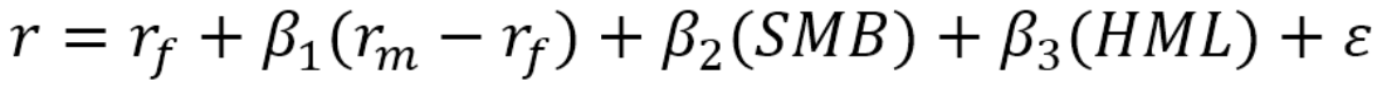

---

In [44]:
def Factor_model(ff_portfolio_data):
    # 월별 수익률 - Factor
    ff_factor = 'F-F_Research_Data_Factors'
    ff_factor_data = web.DataReader(ff_factor, 'famafrench', start=ff_portfolio_data.Date[0])[0]

    # 데이터 병합을 위한 전처리
    ff_portfolio_data['Date']=ff_portfolio_data.Date.apply(lambda x: x[:7])
    ff_portfolio_data = ff_portfolio_data[ff_portfolio_data.Date!='2022-10']
    ff_factor_data = ff_factor_data.reset_index()
    ff_factor_data['Date']=ff_factor_data.Date.astype('str')
    ff_factor_data = ff_factor_data.set_index('Date')
    ff_portfolio_data = ff_portfolio_data.set_index('Date')
    
    # 포트폴리오 수익률 - 무위험 수익률 = 초과 수익률
    ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)

    # 무위험 수익률 변수를 제외한 3개 팩터 변수만 남김
    ff_factor_data = ff_factor_data.drop('RF', axis=1)
    
    # Fama-French 3 factor model
    # OLS - 회귀분석
    beta = []
    step = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, 'vwret'], # 종속변수 
                    exog=add_constant(ff_factor_data) # 독립변수
                    ).fit()
    beta.append(step.params)

    beta = pd.DataFrame(beta, 
                         columns=ff_factor_data.columns, 
                         index=ff_portfolio_data.columns)

    return ff_portfolio_data, ff_factor_data, beta, step

In [45]:
ff_portfolio_data_1, ff_factor_data_1, beta_1,step_1 = Factor_model(ff_portfolio_data_1)

In [46]:
ff_portfolio_data_2, ff_factor_data_2, beta_2,step_2 = Factor_model(ff_portfolio_data_2)

In [47]:
# Fama-French 3 factor
beta_1

,Mkt-RF,SMB,HML
vwret,0.007432,0.000943,0.004775


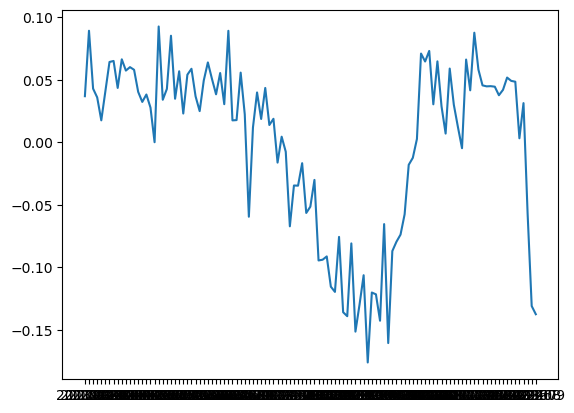

In [51]:
plt.plot(step_1.resid)

In [52]:
beta_2

,Mkt-RF,SMB,HML
vwret,0.020043,0.003699,-0.002063


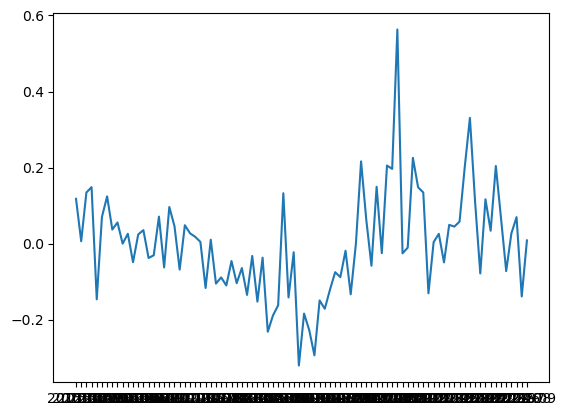

In [53]:
plt.plot(step_2.resid)

In [36]:
step_2.params

const    -0.050732
Mkt-RF    0.020043
SMB       0.003699
HML      -0.002063
dtype: float64

In [37]:
step_2.rsquared

0.3484703468373248

In [38]:
step_2.resid

Date
2015-06    0.117944
2015-07    0.006521
2015-08    0.134462
2015-09    0.148650
2015-10   -0.146156
             ...   
2022-05   -0.072003
2022-06    0.027174
2022-07    0.069846
2022-08   -0.138552
2022-09    0.008710
Length: 88, dtype: float64

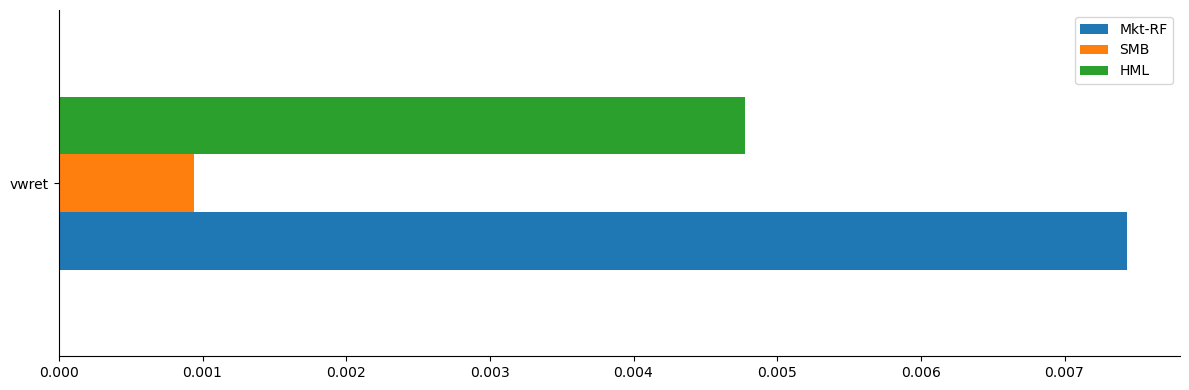

In [17]:
beta_1.plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout()
# mkt는 시장 포트의 베타
# SMB는 소형주 포트 수익률 - 대형주 포트 수익률 의 베타
# HML은 장부가치/시장가치 높은 포트 수익률 - 장부가치/시장가치 낮은 포트 수익률 의 베타

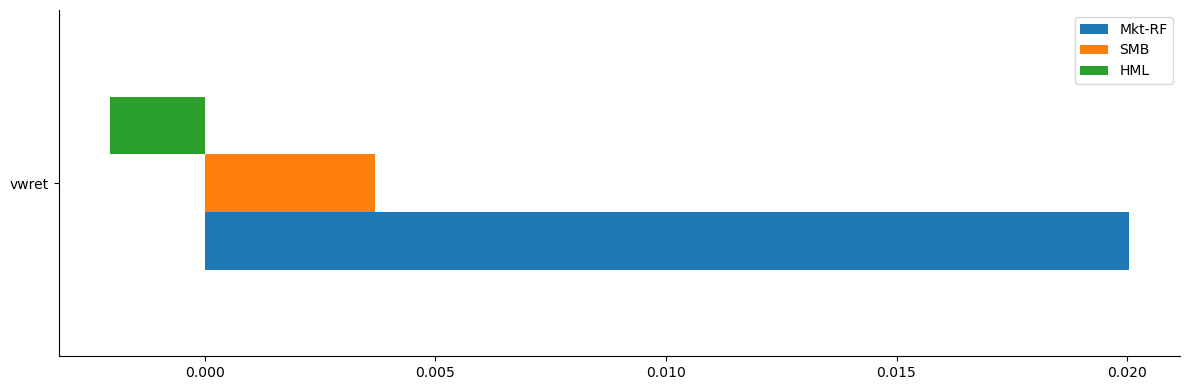

In [18]:
beta_2.plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout()
# mkt는 시장 포트의 베타
# SMB는 소형주 포트 수익률 - 대형주 포트 수익률 의 베타
# HML은 장부가치/시장가치 높은 포트 수익률 - 장부가치/시장가치 낮은 포트 수익률 의 베타

### 결과

#### case 1
- mkt이 0.007432이므로 전체 주식시장 인덱스에 대해 0.7%의 비율로 포트폴리오를 구성한다는 의미
- SMB 0.000943의 의미는 SMB에 대해 +값을 가지기 때문에 소형주 위주의 포트폴리오로 볼 수 있다는 것
    - 구체적으로는 대형주 0.09%를 팔고 소형주 0.09%로 구성한다는 의미
- HML 0.004775의 의미는 HML에 대해 +값을 가지기 때문에 가치주 위주의 포트폴리오로 볼 수 있다는 것
    - 이는 성장주 0.4%를 팔고 가치주 0.4%로 구성한다는 의미
    
전체적으로 보면, 시장수익률을 토대 위에 소형주 중에서 가치주 위주로 포트폴리오를 가져간다고 될 수 있음

#### case 2
- mkt이 0.020043이므로 전체 주식시장 인덱스에 대해 2%의 비율로 포트폴리오를 구성한다는 의미
- SMB 0.003699 의미는 SMB에 대해 +값을 가지기 때문에 소형주 위주의 포트폴리오로 볼 수 있다는 것
    - 구체적으로는 대형주 0.3%를 팔고 소형주 0.3%로 구성한다는 의미
- HML -0.002063 의미는 HML에 대해 -값을 가지기 때문에 성장주 위주의 포트폴리오로 볼 수 있다는 것
    - 이는 가치주 0.2%를 팔고 성장주 0.2%로 구성한다는 의미
    
전체적으로 보면, 시장수익률을 토대 위에 소형주 중에서 성장주 위주로 포트폴리오를 가져간다고 될 수 있음